In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np.random.seed(17)

# Approximation

![](http://dearkidlovemom.com/wp-content/uploads/2013/07/Pi-Approximation-Day.jpg)

See http://eeweb.poly.edu/iselesni/lecture_notes/least_squares/least_squares_SP.pdf

In [3]:
def poly(a):
    return lambda x: np.dot(a, [x ** i for i in range(len(a))])

In [4]:
def apply(f, X):
    return np.array([f(x) for x in X])

In [5]:
def sub_plot(ax, x, y, n, bounds, *methods, **params):
    gs = [method(x, y, n, **params) for method in methods]
    
    points = np.linspace(*bounds, num=100)
    for i in range(len(methods)):
        ax.plot(points, apply(gs[i], points), label=methods[i].__name__)
    ax.plot(x, y, 'rx')
    title = " vs ".join([method.__name__.capitalize() for method in methods]) + " approximation. " + \
                 str(n) + " degree."
    if len(params) > 0:
        title += " Params: " + str(params)
    ax.set_title(title)
    ax.legend(loc="best")

In [6]:
def plot(x, y, n, bounds, *methods, **params):
    figure, ax = plt.subplots(figsize=(15, 10))
    sub_plot(ax, x, y, n, bounds, *methods, **params)

## Ordinary Least Squares approximation

In [7]:
def ols(x, y, n, verbose=False, **unused_params):
    H = np.zeros((len(x), n + 1))
    for i in range(len(x)):
        for j in range(n + 1):
            H[i][j] = x[i] ** j
    A = np.dot(H.T, H)
    z = np.dot(H.T, y)
    c = np.linalg.solve(A, z)
    if not verbose:
        print(c)
    return poly(c)

## Tangent

In [8]:
x = np.linspace(-np.pi / 2.1, np.pi / 2.1, num=50)
y = np.tan(x) + np.random.normal(0, 0.25, 50)

[-0.00778051 -1.24221665  0.02788299  3.14511107]


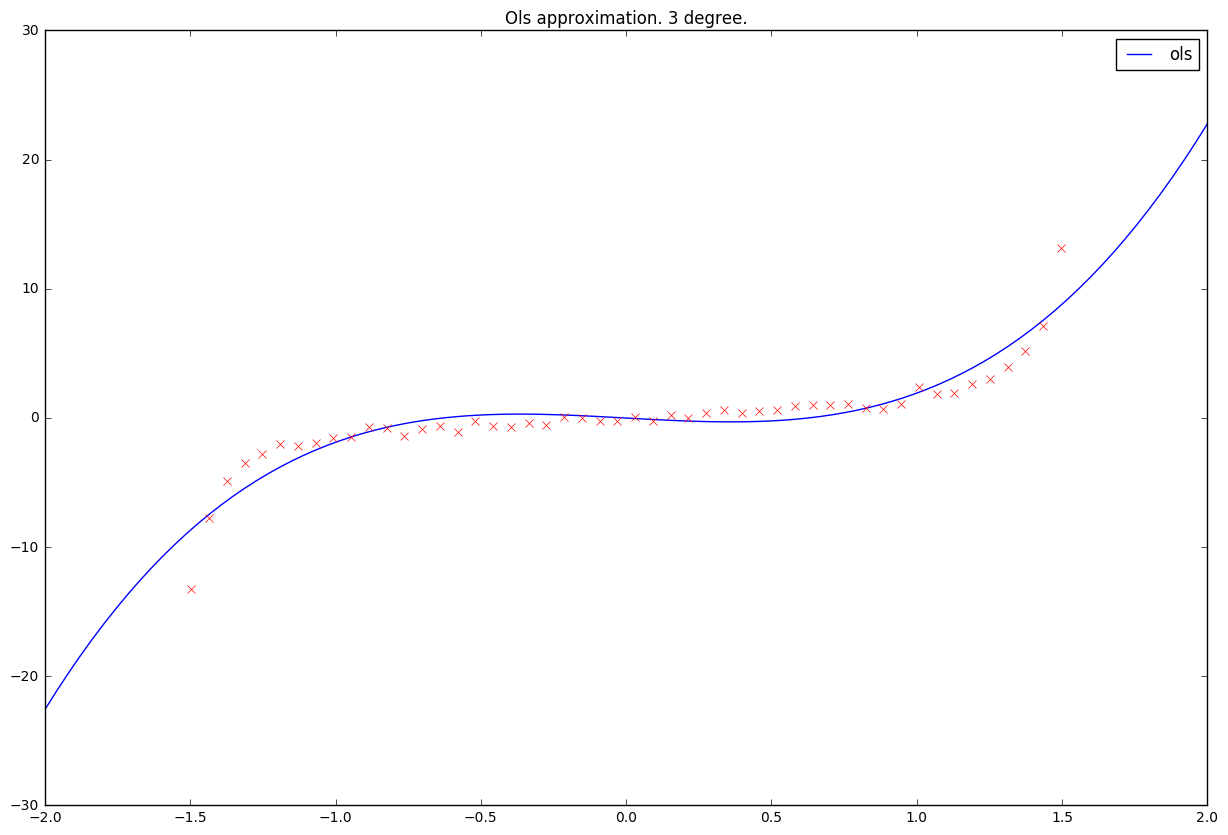

In [9]:
plot(x, y, 3, (-2, 2), ols)

## Sin(x^2)

In [22]:
x = np.linspace(0, np.pi, num=100)
y = np.sin(x**2) + np.random.normal(0, 0.05, 100)

[-0.53321369  3.63459182 -3.19714101  0.82778142 -0.04269458]


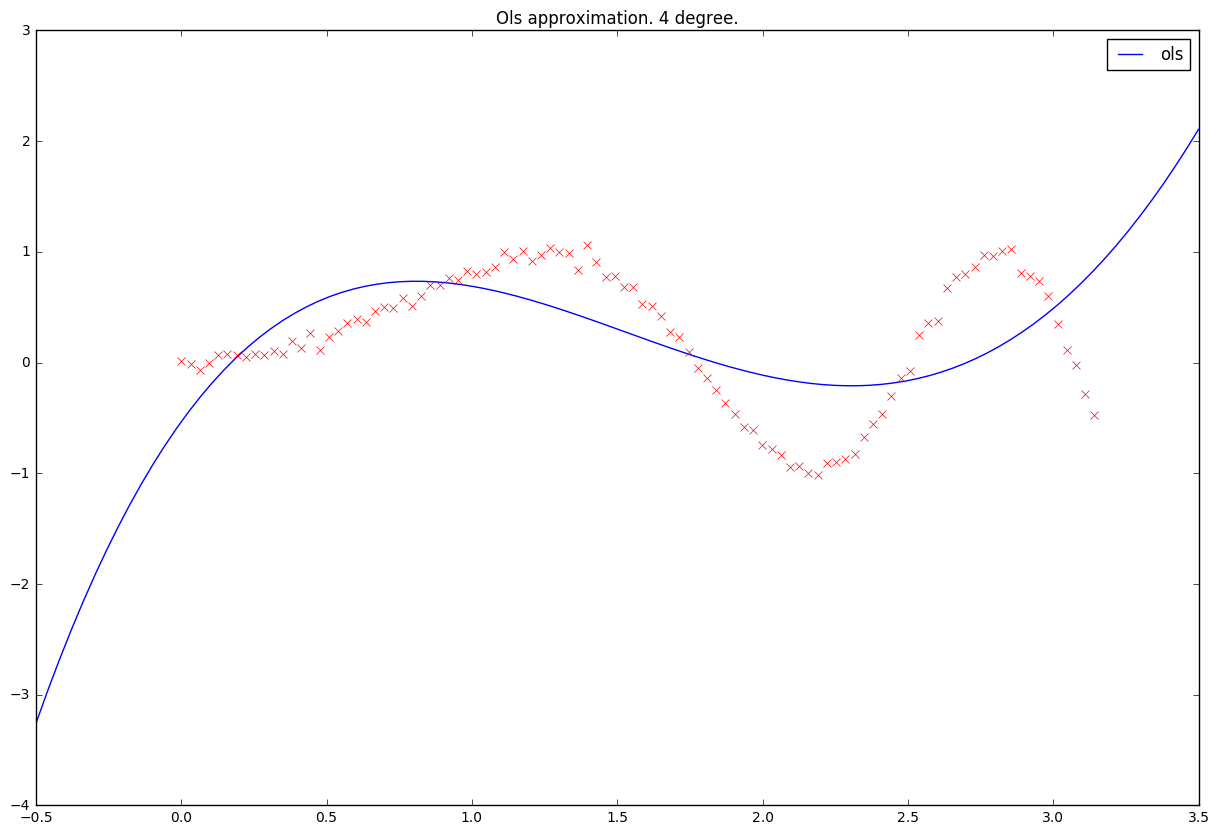

In [23]:
plot(x, y, 4, (-0.5, 3.5), ols)

## Degree matters

In [12]:
def n_plot(x, y, ns, bounds, *methods):
    figure, axs = plt.subplots(len(ns), figsize=(15, len(ns) * 5))
    for i in range(len(ns)):
        sub_plot(axs[i], x, y, ns[i], bounds, *methods)

In [13]:
x = np.linspace(-1, 3 * np.pi, num=50)
y = np.sin(x)*x + np.random.normal(0, 0.2, 50)

[-0.84037995  0.41941546]
[ 0.84661709 -1.28918787  0.20280693]
[ 0.82442306 -1.04618585  0.1181519   0.00669889]
[ 2.3760031   2.13668669 -2.63632769  0.57091094 -0.03348528]


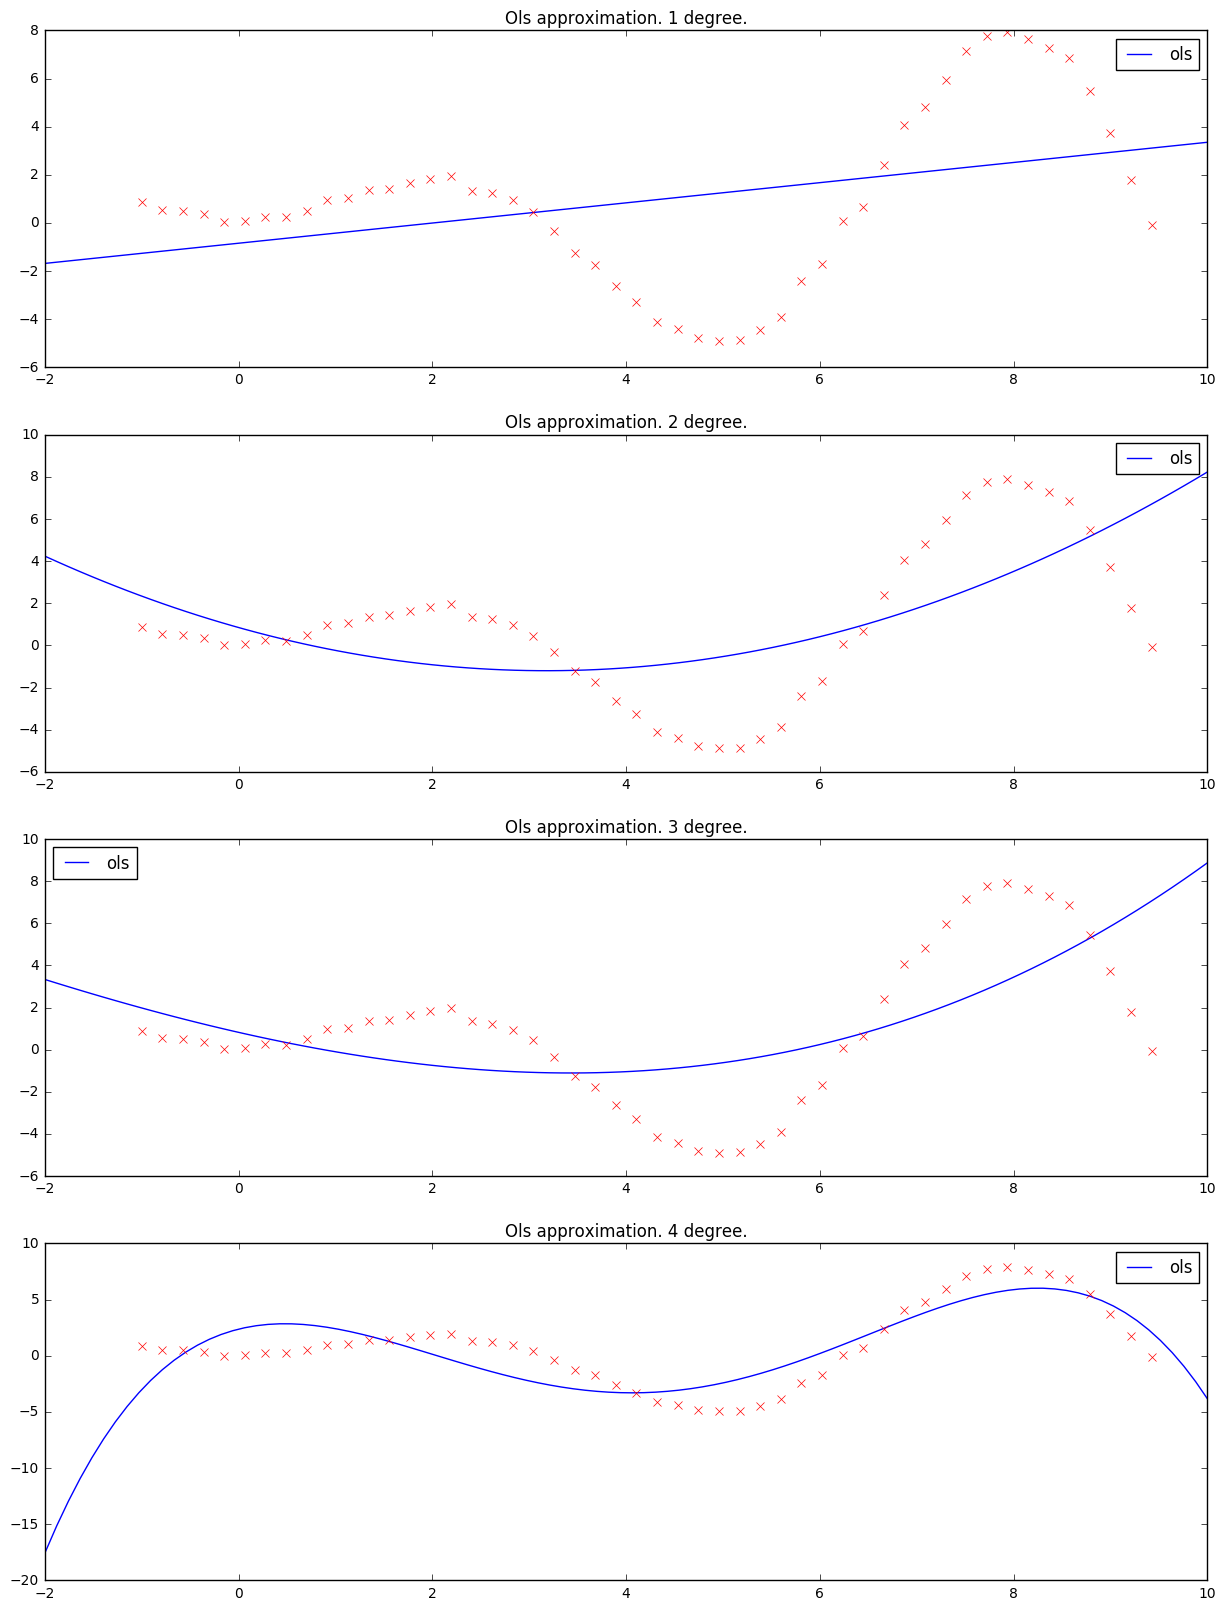

In [14]:
n_plot(x, y, np.arange(1, 5), (-2, 10), ols)

## Smoothing spline approximation

In [15]:
def smoothing_spline(x, y, n, alpha=0.1, verbose=False):
    H = np.zeros((len(x), n + 1))
    for i in range(len(x)):
        for j in range(n + 1):
            H[i][j] = x[i] ** j
    D = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(n + 1):
            if j == i or j == i + 2:
                D[i][j] = 1
            elif j == i + 1:
                D[i][j] = -2
    A = np.dot(H.T, H) + alpha * np.dot(D.T, D)
    z = np.dot(H.T, y)
    c = np.linalg.solve(A, z)
    if not verbose:
        print(c)
    return poly(c)

In [16]:
x = np.linspace(0, np.pi, num=100)
y = np.arctan(x**8) + np.random.normal(0, 0.05, 100)

[-0.18938151  0.24422042  0.77094218  0.26586936 -0.39436268  0.07738033]
[ 0.29599061 -3.52349308  7.93303943 -5.11866098  1.35763646 -0.12897633]


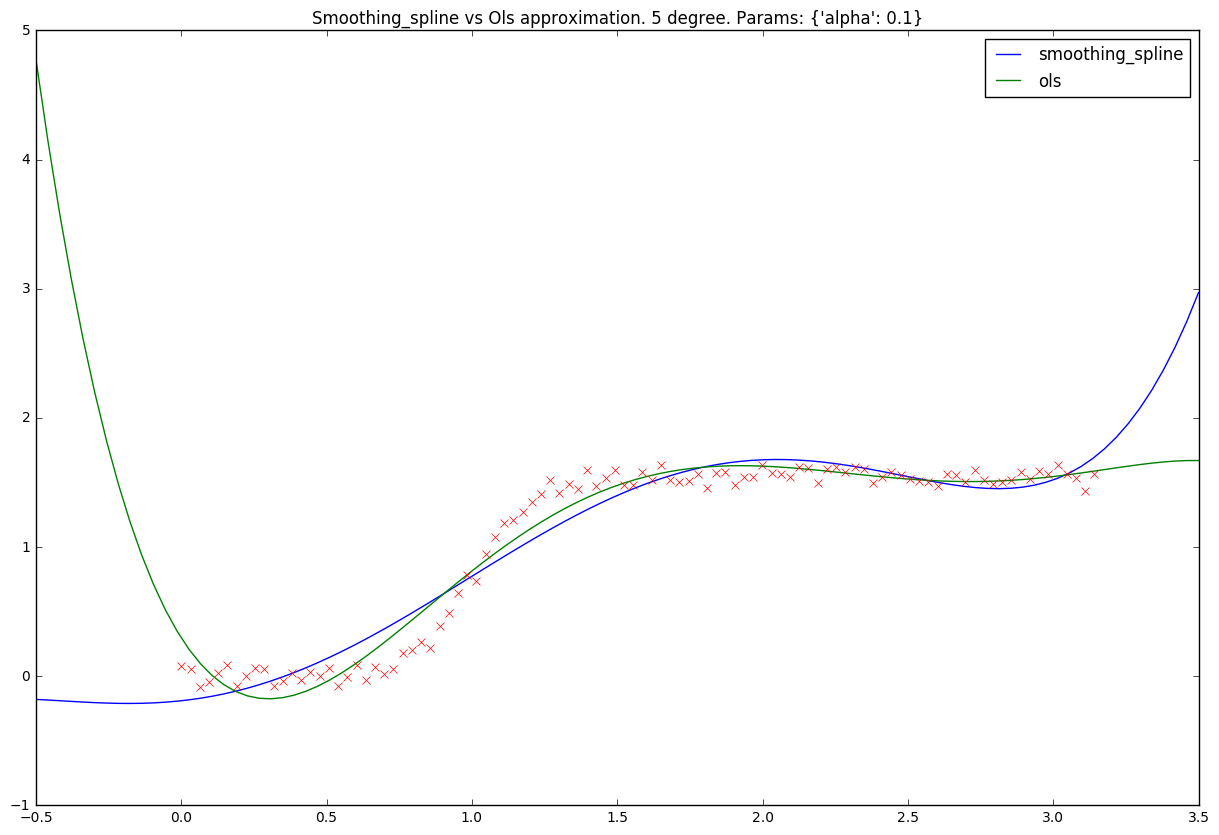

In [17]:
plot(x, y, 5, (-0.5, 3.5), smoothing_spline, ols, alpha=0.1)

## The power of Alpha

In [18]:
def n_plot(x, y, n, alphas, bounds, *methods):
    figure, axs = plt.subplots(len(alphas), figsize=(15, len(alphas) * 5))
    for i in range(len(alphas)):
        sub_plot(axs[i], x, y, n, bounds, *methods, alpha=alphas[i])

In [19]:
x = np.linspace(0.01, np.pi, num=20)
y = np.cos(x**3)*x**0.1 + np.random.normal(0, 0.1, 20)

[ 0.91924454  0.17042159 -0.50276875 -0.56763433 -0.0760148   0.31861437
  0.14697098 -0.16970454  0.03677614 -0.00153179]
[ 0.78032557  0.15283416 -0.26041803 -0.33182304 -0.14385351  0.06993758
  0.1127754   0.0089179  -0.03781716  0.00767307]
[ 0.50176623  0.163519   -0.08118042 -0.17076518 -0.11639905 -0.00086366
  0.06603337  0.03049996 -0.03277491  0.0058042 ]
[ 0.21157407  0.11081015  0.02957745 -0.01703242 -0.02680167 -0.01238293
  0.00418047  0.00563811 -0.00322207  0.00055163]


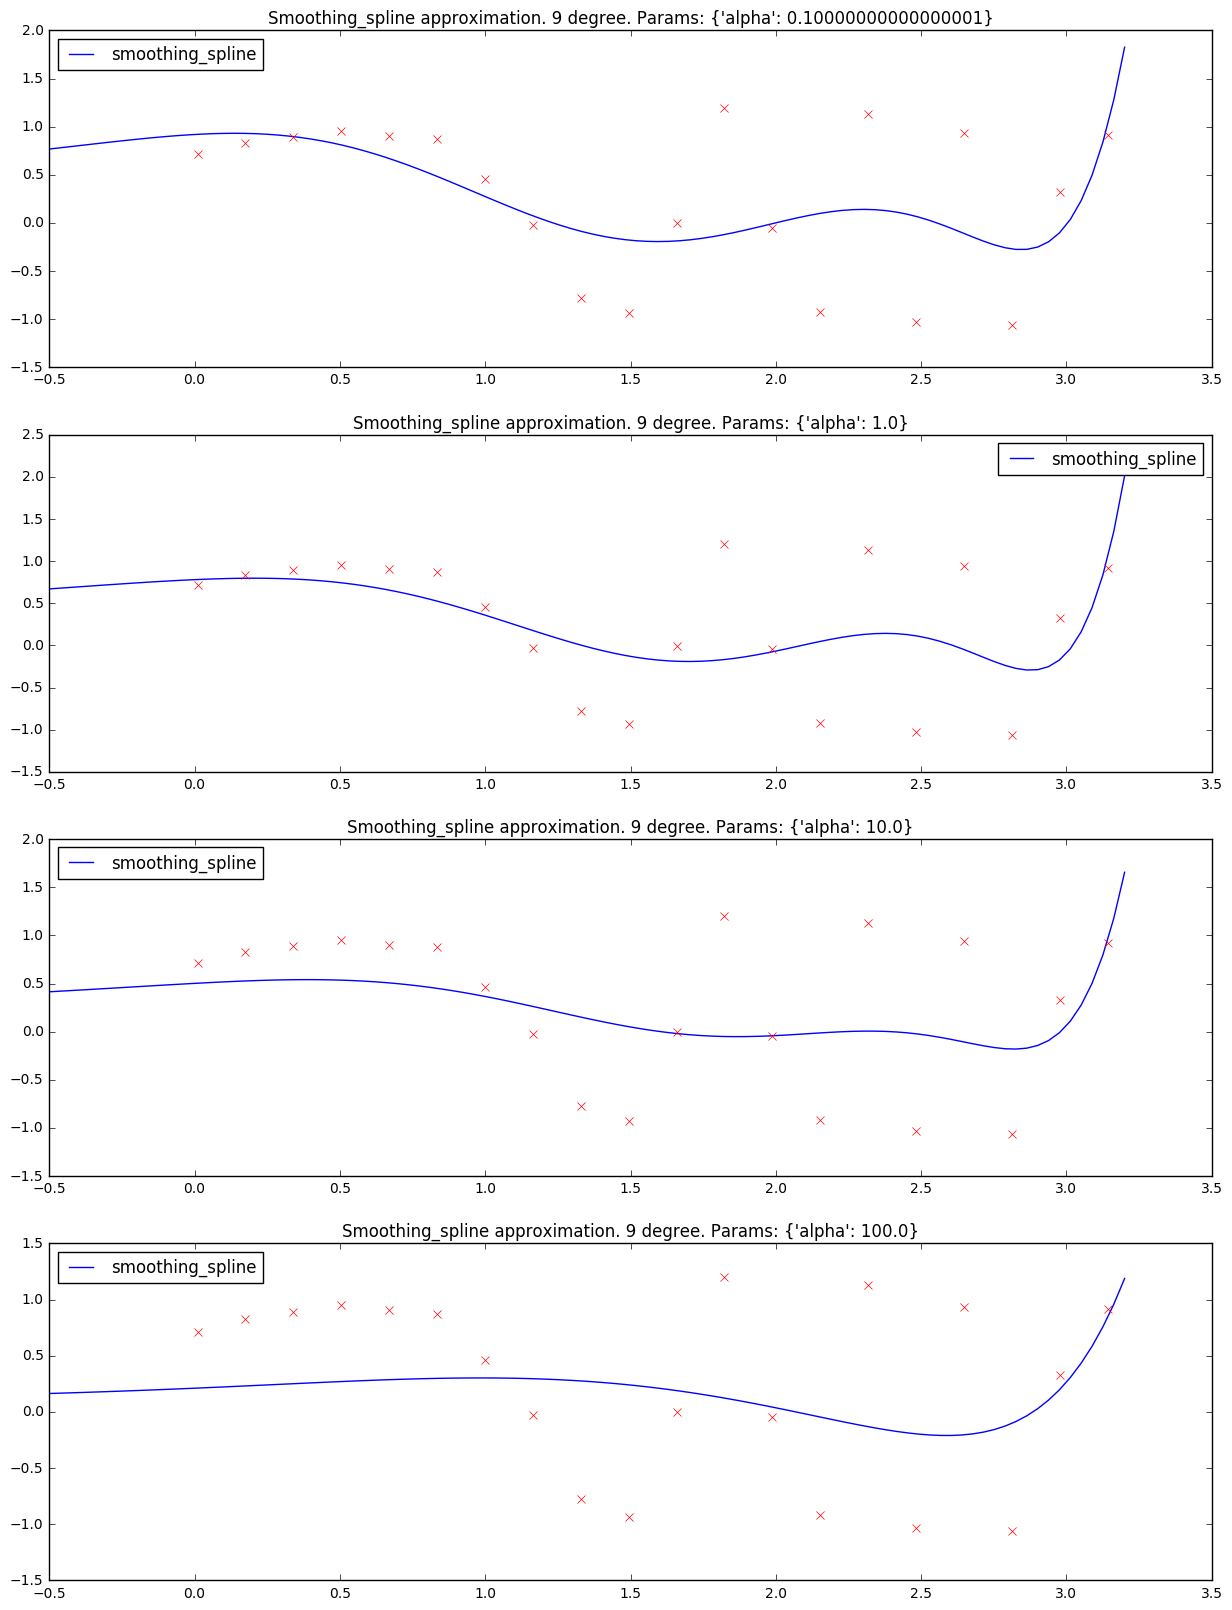

In [20]:
n_plot(x, y, 9, np.logspace(-1, 2, num=4, endpoint=True), (-0.5, 3.2), smoothing_spline)